In [2]:
import pandas as pd
import os
import numpy as np

In [8]:
nptest = np.load('data/clustering_features.npy')
nptest[0]

array([2.89030365e-25, 1.22061887e-16, 1.89983599e-21, 1.74652069e-53,
       7.64580047e-32, 7.36790967e-28, 1.99043489e-37, 1.47726716e-26,
       7.58449633e-22, 1.36715798e-58, 6.11244319e-13, 4.09395731e-46,
       2.60113807e-71, 0.00000000e+00, 8.22013121e-26, 1.00000000e+00,
       2.13310268e-10, 7.13593409e-32, 1.30186146e-18, 1.28598067e-95,
       7.60510386e-28, 2.44400280e-16, 3.94526625e-16])

In [13]:
nptest = np.load('data/node_info.npy')
nptest[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
nptest[:100]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  9.],
       [ 8.,  0.,  1., ...,  0.,  0., 11.],
       ...,
       [27.,  0.,  0., ...,  0.,  0., 13.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  4.]])

In [11]:
nptest = np.load('data/walk_label_features.npy')
nptest[1]

array([0.        , 0.00408163, 0.01632653, 0.01428571, 0.0755102 ,
       0.00816326, 0.00204082, 0.01020408, 0.00816326, 0.00204082,
       0.00204082, 0.01428571, 0.14285715, 0.0122449 , 0.0122449 ,
       0.00204082, 0.        , 0.00408163, 0.        , 0.00204082,
       0.00204082, 0.0122449 , 0.        , 0.6530612 ], dtype=float32)

In [1]:
base_path = './data'
publish_path = ''

link_p1_path = os.path.join(base_path, publish_path, 'link_phase1.csv')
nodes_path = os.path.join(base_path, publish_path, 'IDandLabels.csv')
edges_df = pd.read_csv(link_p1_path)
nodes_df = pd.read_csv(nodes_path, dtype={'Label':str})


In [2]:
cite1_df = edges_df.groupby('paper_id').count()['reference_paper_id']
cite2_df = edges_df.groupby('reference_paper_id').count()['paper_id']
count_df = pd.merge(cite1_df, cite2_df, how='outer', left_index=True, right_index=True)
count_df.fillna(0, inplace=True)
count_df.columns=['cite1', 'cite2']
# 对引用数做归一化
count_df = (count_df-count_df.mean())/(count_df.std()+0.1)

In [4]:
feat_arr = nodes_df.merge(count_df, how='left', left_on='paper_id', right_index=True)[['cite1','cite2']].values
feat_arr[np.isnan(feat_arr)] = -1
# 使用Numpy保存特征为.npy格式，以节省存储空间和提高读写速度
with open(os.path.join(base_path, publish_path, './count_features.npy'), 'wb') as f:
    np.save(f, feat_arr)

In [2]:
cite1_df = edges_df.groupby('paper_id').count()['reference_paper_id']
cite2_df = edges_df.groupby('reference_paper_id').count()['paper_id']
count_df = pd.merge(cite1_df, cite2_df, how='outer', left_index=True, right_index=True)
count_df.fillna(0, inplace=True)
count_df.columns=['cite1', 'cite2']

<AxesSubplot:>

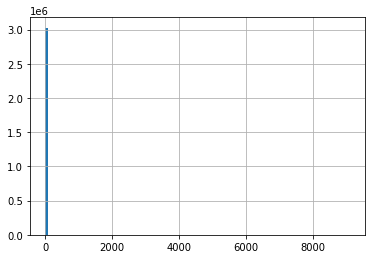

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
count_df['cite1'].hist(bins=100)



In [7]:
max(count_df['cite1'])

9102.0

<AxesSubplot:>

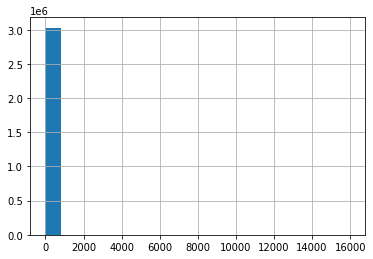

In [5]:
count_df['cite2'].hist(bins=20)

In [8]:
max(count_df['cite2'])

15981.0

In [9]:
count_df.describe()

,cite1,cite2
count,3.031367e+06,3.031367e+06
mean,9.622276e+00,9.622276e+00
std,1.152019e+01,4.937654e+01
min,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00
50%,7.000000e+00,2.000000e+00
75%,1.300000e+01,7.000000e+00
max,9.102000e+03,1.598100e+04


In [1]:
np.zeros((3,3))

NameError: name 'np' is not defined